In [1]:
from surfplot import Plot
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
from utils import get_annot_labels
from utils import rois2maps
from neuromaps.datasets import fetch_fsaverage 

In [6]:
base_path = os.path.dirname(os.getcwd())

dat = pd.read_csv(base_path + '/data/STOPPD/parcelwise_groupdifference.csv')

# make maps to plt
lh_dat = dat.loc[dat['parcel'].str.contains('lh_'),:]
rh_dat = dat.loc[dat['parcel'].str.contains('rh_'),:]

In [7]:
# get labels 
lh_labels = get_annot_labels('lh.aparc.annot')    
rh_labels = get_annot_labels('rh.aparc.annot')


In [15]:
dat

,parcel,t-value,p-value
0,lh_bankssts_thickness,1.940094,0.055898
1,lh_caudalanteriorcingulate_thickness,2.733249,0.007755
2,lh_caudalmiddlefrontal_thickness,2.831823,0.005876
3,lh_cuneus_thickness,0.255475,0.799027
4,lh_entorhinal_thickness,1.164939,0.247567
...,...,...,...
63,rh_supramarginal_thickness,1.523242,0.131698
64,rh_frontalpole_thickness,-0.033152,0.973637
65,rh_temporalpole_thickness,-0.067359,0.946466
66,rh_transversetemporal_thickness,1.075307,0.285476


In [8]:
# make unthresholded p-value map
pmap = rois2maps(lh_dat, rh_dat, 'p-value', lh_labels, rh_labels)


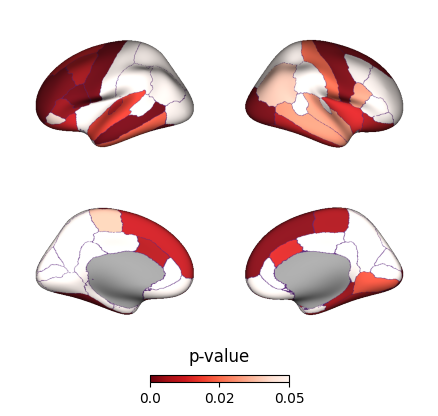

In [9]:
# plot 
surface = fetch_fsaverage(density='164k')
lh, rh = surface['inflated']
dk = {'left': np.array(lh_labels), 'right': np.array(rh_labels)} # outlines 

p = Plot(lh, rh, views=['lateral', 'medial'], zoom=1.2)
p.add_layer(pmap, cmap='Reds_r', cbar_label='p-value', color_range = (0,0.05))
p.add_layer(dk, as_outline=True, cbar=False)
  
pic = p.build()

# fix legend 
cbar_ax = pic.axes[-1]
cbar_ax.set_ylabel('')
cbar_ax.set_title('p-value', pad=10);
pic.savefig(os.path.join(base_path + '/figs/OLZ_parcelwise_groupdifference_pval.jpg'), dpi=300, transparent=True)


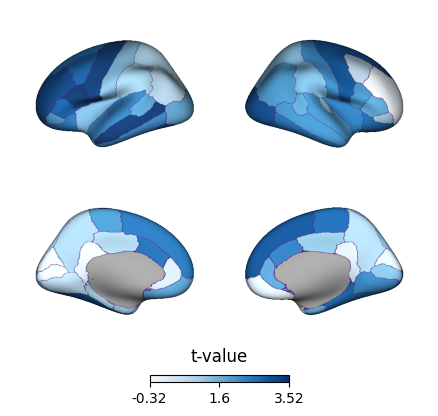

In [14]:
tmap = rois2maps(lh_dat, rh_dat, 't-value', lh_labels, rh_labels)

# plot 
surface = fetch_fsaverage(density='164k')
lh, rh = surface['inflated']
dk = {'left': np.array(lh_labels), 'right': np.array(rh_labels)} # outlines 

p = Plot(lh, rh, views=['lateral', 'medial'], zoom=1.2)
p.add_layer(tmap, cmap='Blues', cbar_label='t-value')
p.add_layer(dk, as_outline=True, cbar=False)
  
pic = p.build()

# fix legend 
cbar_ax = pic.axes[-1]
cbar_ax.set_ylabel('')
cbar_ax.set_title('t-value', pad=10);
pic.savefig(os.path.join(base_path + '/figs/OLZ_parcelwise_groupdifference_tval.jpg'), dpi=300, transparent=True)

